# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 21.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
272624,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.0122,0.0024,0.0195,0,0,0,0
36723,0.1074,0.0098,0.9937,0.0049,0.0024,0.0024,0.2539,0.4663,0.0635,0.4370,4,4,5,5
333556,0.4175,0.4590,0.1270,0.0024,0.0024,0.0195,0.5933,0.8960,0.0024,1.4746,5,5,10,10
104370,0.0146,0.0024,0.0024,0.0024,0.0024,0.0024,0.1929,0.0391,0.0024,0.0171,0,0,0,0
20115,0.1270,0.0879,0.2344,0.0024,0.0024,0.0024,0.1001,0.4883,0.0244,0.2734,4,4,3,3


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474360 entries, 0 to 474359
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          474360 non-null  float64
 1   Emg2          474360 non-null  float64
 2   Emg3          474360 non-null  float64
 3   Emg4          474360 non-null  float64
 4   Emg5          474360 non-null  float64
 5   Emg6          474360 non-null  float64
 6   Emg7          474360 non-null  float64
 7   Emg8          474360 non-null  float64
 8   Emg9          474360 non-null  float64
 9   Emg10         474360 non-null  float64
 10  repetition    474360 non-null  int64  
 11  rerepetition  474360 non-null  int64  
 12  stimulus      474360 non-null  int64  
 13  restimulus    474360 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.7 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000
mean,0.160505,0.142269,0.172002,0.046039,0.011075,0.027917,0.315248,0.309821,0.053934,0.377027,3.131552,2.228957,5.549161,4.007633
std,0.339476,0.326525,0.424151,0.168354,0.032590,0.077402,0.423296,0.421916,0.161553,0.583646,3.480692,3.258935,6.568903,6.186889
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.090300,0.029300,0.002400,0.036600,0.000000,0.000000,0.000000,0.000000
50%,0.029300,0.002400,0.002400,0.002400,0.002400,0.002400,0.192900,0.117200,0.002400,0.158700,2.000000,0.000000,3.000000,0.000000
75%,0.153800,0.114700,0.185500,0.002400,0.002400,0.017100,0.368700,0.481000,0.029300,0.498000,6.000000,4.000000,10.000000,7.000000
max,4.660600,4.316400,4.655800,4.038100,0.712900,2.050800,4.658200,4.660600,3.933100,4.658200,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204306
7      15626
8      15623
12     15606
2      15606
4      15601
6      15584
5      15581
9      15580
11     15571
10     15558
1      15549
3      15534
17     10420
14     10406
13     10403
15     10366
16     10340
19      5202
21      5202
18      5201
20      5169
22      5164
23      5162
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.753030,-0.774419,-0.352178,-0.668506
1,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.753030,-0.774419,-0.352178,-0.668506
2,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.753030,-0.774419,-0.352178,-0.668506
3,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.753030,-0.774419,-0.352178,-0.668506
4,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.753030,-0.774419,-0.352178,-0.668506
...,...,...,...,...,...,...,...,...,...,...
395362,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.688582,-0.768842,-0.352178,-0.664504
395363,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.709918,-0.774419,-0.352178,-0.660662
395364,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.699140,-0.774419,-0.352178,-0.656660
395365,-0.502674,-0.472699,-0.437307,-0.285603,-0.293001,-0.349257,-0.645470,-0.774419,-0.352178,-0.656660


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 10s 61ms/step - loss: 1.2202 - accuracy: 0.6712 - val_loss: 0.8251 - val_accuracy: 0.7643
Epoch 2/100
78/78 [==============================] - 2s 28ms/step - loss: 0.7393 - accuracy: 0.7869 - val_loss: 0.6448 - val_accuracy: 0.8123
Epoch 3/100
78/78 [==============================] - 2s 26ms/step - loss: 0.6201 - accuracy: 0.8194 - val_loss: 0.5658 - val_accuracy: 0.8345
Epoch 4/100
78/78 [==============================] - 2s 27ms/step - loss: 0.5506 - accuracy: 0.8372 - val_loss: 0.5144 - val_accuracy: 0.8482
Epoch 5/100
78/78 [==============================] - 2s 26ms/step - loss: 0.5072 - accuracy: 0.8487 - val_loss: 0.4820 - val_accuracy: 0.8560
Epoch 6/100
78/78 [==============================] - 2s 27ms/step - loss: 0.4750 - accuracy: 0.8575 - val_loss: 0.4494 - val_accuracy: 0.8650
Epoch 7/100
78/78 [==============================] - 2s 26ms/step - loss: 0.4492 - accuracy: 0.8646 - val_loss: 0.4325 - val_accuracy: 0.8693
Epoch

78/78 [==============================] - 2s 28ms/step - loss: 0.1634 - accuracy: 0.9494 - val_loss: 0.2077 - val_accuracy: 0.9382
Epoch 59/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1599 - accuracy: 0.9501 - val_loss: 0.2158 - val_accuracy: 0.9362
Epoch 60/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1590 - accuracy: 0.9505 - val_loss: 0.2072 - val_accuracy: 0.9380
Epoch 61/100
78/78 [==============================] - 2s 28ms/step - loss: 0.1559 - accuracy: 0.9514 - val_loss: 0.2087 - val_accuracy: 0.9380
Epoch 62/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1558 - accuracy: 0.9515 - val_loss: 0.2163 - val_accuracy: 0.9372
Epoch 63/100
78/78 [==============================] - 2s 28ms/step - loss: 0.1560 - accuracy: 0.9516 - val_loss: 0.2055 - val_accuracy: 0.9396
Epoch 64/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1518 - accuracy: 0.9526 - val_loss: 0.2031 - val_accuracy: 0.9408
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

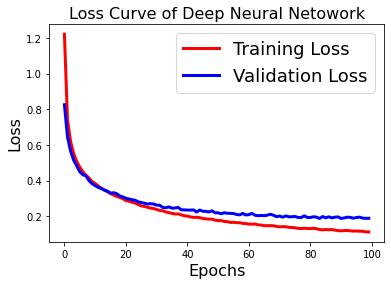

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

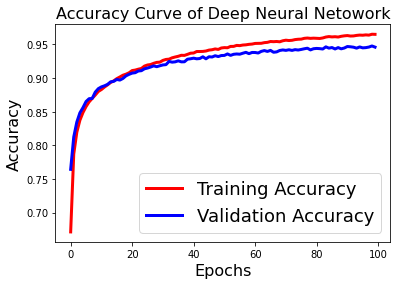

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  0, 11, ...,  5,  0,  2], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.59367175051217


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     40693
           1       0.90      0.90      0.90      2211
           2       0.94      0.90      0.92      2205
           3       0.93      0.92      0.92      2240
           4       0.97      0.88      0.93      2299
           5       0.89      0.91      0.90      2190
           6       0.93      0.93      0.93      2298
           7       0.93      0.87      0.90      2181
           8       0.93      0.87      0.90      2126
           9       0.94      0.87      0.91      2138
          10       0.88      0.88      0.88      1939
          11       0.91      0.89      0.90      2149
          12       0.92      0.90      0.91      2203
          13       0.86      0.93      0.89      1470
          14       0.89      0.84      0.86      1353
          15       0.86      0.88      0.87      1363
          16       0.97      0.92      0.95      1631
 

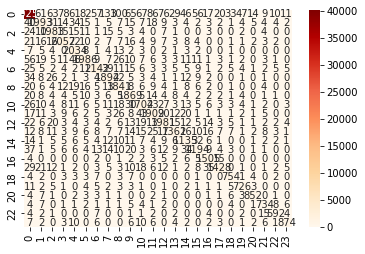

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.36989402331992816
MSE: 4.048751802109416
RMSE: 2.0121510385926342


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.94588763138976
Recall Score :  0.9459367175051218
f1_score :  0.945605467745451
